"""Project 1: Cifar 100 classification
Dataset Link: this Dataset is available in tensorflow datasets"""


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar100.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([19, 29,  0, 11,  1])

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle',
           'chair','chimpanzee','clock','cloud','cockroach','couch','cra','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo',
           'keyboard','lamp','lawn_mower','leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree',
           'pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum','rabbit','raccoon',"ray","road","rocket","rose","sea","seal","shark","shrew","skunk","skyscraper",
           "snail","snake",'spider',"squirrels","treetcar","sunflower","sweet_pepper","table","tank","telephone","television","tiger","tractor","train","trout","tulip","turtle","wardrobe",
           'whale','willow_tree','wolf','woman','worm']

In [ ]:
len(classes)

100

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

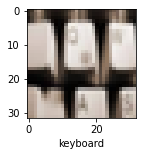

In [ ]:
plot_sample(X_train, y_train, 15)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(700, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(100, activation ='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy']
              )


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 17s 8ms/step - loss: 4.0020 - accuracy: 0.0802 - val_loss: 3.5974 - val_accuracy: 0.1369
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 3.3798 - accuracy: 0.1841 - val_loss: 3.2057 - val_accuracy: 0.2146
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 3.0279 - accuracy: 0.2478 - val_loss: 3.0191 - val_accuracy: 0.2574
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 2.7790 - accuracy: 0.2974 - val_loss: 2.8889 - val_accuracy: 0.2828
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 2.5776 - accuracy: 0.3381 - val_loss: 2.8277 - val_accuracy: 0.3045
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3940 - accuracy: 0.3776 - val_loss: 2.8559 - val_accuracy: 0.3058
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2031 - accuracy: 0.4134 - val_loss: 2.8267 - val_accuracy

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.1197 - accuracy: 0.3285


[3.119729995727539, 0.32850000262260437]

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15]

[69, 38, 45, 51, 71, 3, 38, 61, 23, 9, 87, 75, 13, 69, 40]

In [ ]:
y_test[:15]

array([49, 33, 72, 51, 71, 92, 15, 14, 23,  0, 71, 75, 81, 69, 40])

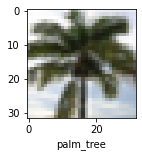

In [ ]:
plot_sample(X_test, y_test,44)

In [ ]:
classes[y_classes[44]]

'palm_tree'